# Final Project Coding 

#### DataFrame Definition:
df = original raw data;

CleanD = Cleaned Data after preprocessing;

CleanD1 = Replace education & marital_status to numeric;

CleanD2 = Change education & marital_status to dummy variables;

Packages to install: 1) mlxtend 2) sklearn 3) numpy 4) pandas 5) datetime 6) seaborn 7) matplotlib 8) dataprep

# **Read Raw Data**

In [ ]:
#importing the relevant packages
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

#read the raw csv file which is also submitted via canvas
# the filepath has to be modified 
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
df

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation  ...             3         11         1
1      2174        1954  Graduation  ...             3         11         0
2      4141        1965  Graduation  ...             3         11         0
3      6182        1984  Graduation  ...             3         11         0
4      5324        1981         PhD  ...             3         11         0
...     ...         ...         ...  ...           ...        ...       ...
2235  10870        1967  Graduation  ...             3         11         0
2236   4001        1946         PhD  ...             3         11         0
2237   7270        1981  Graduation  ...             3         11         0
2238   8235        1956      Master  ...             3         11         0
2239   9405        1954         PhD  ...             3         11         1

[2240 rows x 29 columns]

NumExpr defaulting to 2 threads.



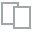
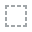
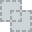
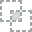
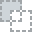
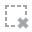
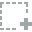
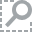
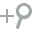
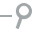
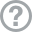
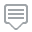
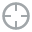
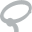
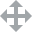
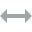
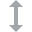
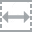
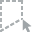
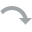
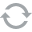
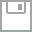
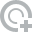
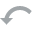
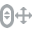
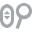
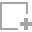
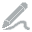
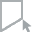
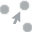
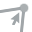
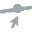

In [ ]:
# We use dataprep package to visualize our data. 
#!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(df)

# **Models on raw data to find benchmark accuracy**

In [ ]:
#find the missing value before we run the models. We have to fill in all the missing value before running the models.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Replace missing value by mean as only the Income column has missing value.
df = df.fillna(df.mean())

#find the duplicated lines
df.duplicated(subset = ['ID']).sum()

#no duplicate values found

0

### Logistic Regression

In [ ]:
#replace the string factors into numerical, in order to run the model, save the replaced data into df1
df1 = df
Cvar1 = {"Education":     {"Graduation": 0, "PhD": 1, "Master": 2, "Basic": 3, "2n Cycle": 4},
                "Marital_Status": {"Single": 0, "Together": 1, "Married": 2, "Divorced": 3,
                                  "Widow": 4, "Alone": 5, "Absurd":6, "YOLO": 7}}
df1 = df1.replace(Cvar1)

#take the columns of the features from column 2 to column 26 as the independent variables, and drop the 'Dt_Customer' column
Xr = df1[df1.columns[2:26]]
Xr = Xr.drop(columns =["Dt_Customer"])
#add the age column into the independent variable set
age = 2021-df["Year_Birth"]
Xr["Age"] = age 
Xr["Complain"] = df1["Complain"]
#y1 is the dependent variable
y1r = df1['Response']
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
Xr_train, Xr_val, y1r_train, y1r_val = train_test_split(Xr, y1r, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler_r = StandardScaler().fit(Xr_train)
standardized_Xr = scaler_r.transform(Xr_train)
standardized_Xr_val = scaler_r.transform(Xr_val)

# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

#Run the logistic regression model
lr1r = LogisticRegression(random_state=0).fit(standardized_Xr, y1r_train)
lr_y1r_pred = lr1r.predict(standardized_Xr_val)

#printing the confusion matrix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matrix_lr = confusion_matrix(y1r_val,lr_y1r_pred, labels=[1,0])
print(matrix_lr)
lr1r_accuracy = accuracy_score(y1r_val, lr_y1r_pred)
from sklearn.metrics import classification_report
print(classification_report(y1r_val, lr_y1r_pred))


[[ 27  41]
 [ 11 369]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.71      0.40      0.51        68

    accuracy                           0.88       448
   macro avg       0.81      0.68      0.72       448
weighted avg       0.87      0.88      0.87       448



## Decision Tree

Education feature score:0.0166 
Marital_Status feature score:0.0383 
Income feature score:0.0869 
Kidhome feature score:0.0049 
Teenhome feature score:0.0145 
Recency feature score:0.0902 
MntWines feature score:0.0393 
MntFruits feature score:0.034 
MntMeatProducts feature score:0.0513 
MntFishProducts feature score:0.0288 
MntSweetProducts feature score:0.0605 
MntGoldProds feature score:0.0464 
NumDealsPurchases feature score:0.0311 
NumWebPurchases feature score:0.0262 
NumCatalogPurchases feature score:0.0599 
NumStorePurchases feature score:0.0435 
NumWebVisitsMonth feature score:0.0514 
AcceptedCmp3 feature score:0.0605 
AcceptedCmp4 feature score:0.0013 
AcceptedCmp5 feature score:0.1181 
AcceptedCmp1 feature score:0.0313 
AcceptedCmp2 feature score:0.0082 
Complain feature score:0.002 
Age feature score:0.0548 


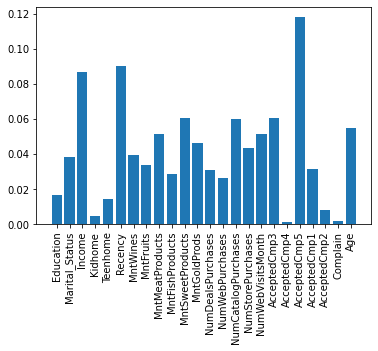

In [ ]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dtr = tree.DecisionTreeClassifier(random_state=0).fit(standardized_Xr, y1r_train)
dt_y1r_pred = dtr.predict(standardized_Xr_val)
dtr_accuracy = accuracy_score(y1r_val, dt_y1r_pred)

#report the importance of each feature in the model
for f,num in zip(Xr_train.columns, dtr.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

#plot the graph with the importance of each feature in the model
plt.bar([x for x in Xr_train.columns], dtr.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#printing the confusion matrix and classification report
matrix_dt = confusion_matrix(y1r_val,dt_y1r_pred, labels=[1,0])
print(matrix_dt)
print(classification_report(y1r_val, dt_y1r_pred))

[[ 28  40]
 [ 38 342]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       380
           1       0.42      0.41      0.42        68

    accuracy                           0.83       448
   macro avg       0.66      0.66      0.66       448
weighted avg       0.82      0.83      0.82       448



# **Preprocessing Steps**

## **Data Cleaning**

In [ ]:
df

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation  ...             3         11         1
1      2174        1954  Graduation  ...             3         11         0
2      4141        1965  Graduation  ...             3         11         0
3      6182        1984  Graduation  ...             3         11         0
4      5324        1981         PhD  ...             3         11         0
...     ...         ...         ...  ...           ...        ...       ...
2235  10870        1967  Graduation  ...             3         11         0
2236   4001        1946         PhD  ...             3         11         0
2237   7270        1981  Graduation  ...             3         11         0
2238   8235        1956      Master  ...             3         11         0
2239   9405        1954         PhD  ...             3         11         1

[2240 rows x 29 columns]

In [ ]:
#We perform the following preprocessing steps to make the data suitable for further analysis
# Checking Null value
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# renaming the column names in order to make it clear
df = df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df = df.rename(columns={'NumWebPurchases': 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store','NumDealsPurchases':'Deals','NumWebVisitsMonth':'WebVisits'})

# Create spending Column which is the total amount spent by the customer from all products
df['Spending'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']


In [ ]:
# Drop Income lower than 10K and greater than 150K to avoid skewed results
index_names = df[df['Income'] <= 10000].index
index_names_2 = df[df['Income'] >= 150000].index

df.drop(index_names, inplace = True)
df.drop(index_names_2, inplace= True)


In [ ]:
#Create Age column for each customer instead of using date of birth for models. 
df['Age'] = 2021 - df['Year_Birth']

In [ ]:
# Wrangling martial_status 
# we structure the marital_status into 2 values instead of the original 7 values. The 2 values being Single and In couple
df['Marital_Status'] = df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [ ]:
# Replacing 2n cycle with Masters in the Education column
df['Education'] = df['Education'].replace({'Basic':'HighSchool','2n Cycle':'Master','Graduation':'Undergrads','Master':'Master','PhD':'PhD'})

In [ ]:
# Replacing Kidhome and Teenhome with a single column named Children
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].replace({3: "3",2:'2',1:'1',0:"0"},inplace=True)


In [ ]:
df = df[['Age','Education','Marital_Status','Income','Spending','Children','Wines','Fruits','Meat','Fish','Sweets','Gold','Deals','Web','Catalog','Store','WebVisits','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]
df

Age   Education Marital_Status  ...  AcceptedCmp2  Complain Response
0      64  Undergrads          Alone  ...             0         0        1
1      67  Undergrads          Alone  ...             0         0        0
2      56  Undergrads      In couple  ...             0         0        0
3      37  Undergrads      In couple  ...             0         0        0
4      40         PhD      In couple  ...             0         0        0
...   ...         ...            ...  ...           ...       ...      ...
2235   54  Undergrads      In couple  ...             0         0        0
2236   75         PhD      In couple  ...             0         0        0
2237   40  Undergrads          Alone  ...             0         0        0
2238   65      Master      In couple  ...             0         0        0
2239   67         PhD      In couple  ...             0         0        1

[2203 rows x 24 columns]

In [ ]:
# Copying cleaned data into CleanD
CleanD = df

In [ ]:
#replace the string factors into numerical, in order to run the models, save the replaced data into CleanD1
CleanD1 = CleanD
Cvar = {"Education":     {"Undergrads": 0, "PhD": 1, "Master": 2, "HighSchool": 3},
                "Marital_Status": {"Alone": 0, "In couple": 1}}
CleanD1 = CleanD1.replace(Cvar)

In [ ]:
#table to show the detailed statistics of the overall data.
CleanD1.describe()

Age    Education  ...     Complain     Response
count  2203.000000  2203.000000  ...  2203.000000  2203.000000
mean     52.300499     0.796641  ...     0.009532     0.150250
std      11.972855     0.899312  ...     0.097190     0.357397
min      25.000000     0.000000  ...     0.000000     0.000000
25%      44.000000     0.000000  ...     0.000000     0.000000
50%      51.000000     0.000000  ...     0.000000     0.000000
75%      62.000000     2.000000  ...     0.000000     0.000000
max     128.000000     3.000000  ...     1.000000     1.000000

[8 rows x 23 columns]

# **Data Visualization after data cleaning**

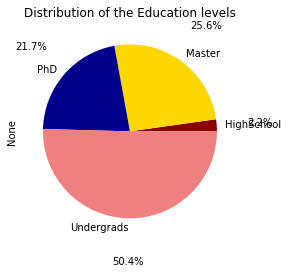

In [ ]:
# exploring the distribution of each education level in the samples
from matplotlib import pyplot as plt
labels = CleanD1['Education'].unique()
colors = ['darkred', 'gold', 'darkblue', 'lightcoral', 'lightskyblue']
CleanD.groupby('Education').size().plot(kind='pie', colors=colors, autopct='%1.1f%%', textprops={'fontsize': 10}, pctdistance=1.5)
plt.title("Distribution of the Education levels")
plt.show()

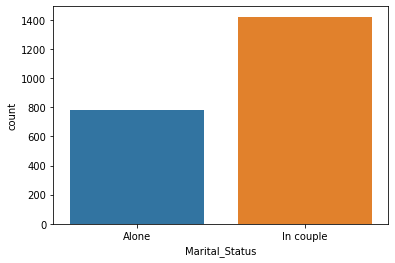

In [ ]:
# frequencies of the martial status in the samples
import seaborn as sns
sns.countplot(x ='Marital_Status', data = CleanD)

(0.0, 160000.0)

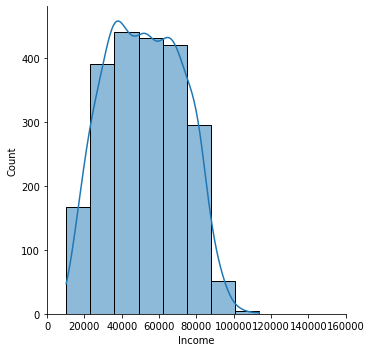

In [ ]:
# plotting the distribution of Income
a = CleanD['Income']
g = sns.displot(a, bins=8, kde=True)
plt.xlim(0, 160000)

1. Add age column and replace the year of birth
2. Split the data into training and validation set
3. Standardize the attributes in the dataset
4. Run the different ML algorithms on different promotions (6 of them)!

### Before running the models, the following preparation should be done. 

In [ ]:
#take the columns of the features from column 2 to column 26 as the independent variables, and drop the 'Dt_Customer' column
X = CleanD1[CleanD1.columns[0:22]]
#y1 is the dependent variable
y1 = CleanD1['Response']

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_val, y1_train, y1_val = train_test_split(
    X, y1, test_size=0.2, random_state=1)

In [ ]:
#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_val = scaler.transform(X_val)

# **Prediction Models on Response:**

In [ ]:
CleanD1

Age  Education  Marital_Status  ...  AcceptedCmp2  Complain Response
0      64          0               0  ...             0         0        1
1      67          0               0  ...             0         0        0
2      56          0               1  ...             0         0        0
3      37          0               1  ...             0         0        0
4      40          1               1  ...             0         0        0
...   ...        ...             ...  ...           ...       ...      ...
2235   54          0               1  ...             0         0        0
2236   75          1               1  ...             0         0        0
2237   40          0               0  ...             0         0        0
2238   65          2               1  ...             0         0        0
2239   67          1               1  ...             0         0        1

[2203 rows x 24 columns]

## Models on Cleaned Data

In [ ]:
#take the columns of the features from column 0 to column 22 as the independent variables
X = CleanD1[CleanD1.columns[0:22]]
#y1 is the dependent variable
y1 = CleanD1['Response']
y1

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2203, dtype: int64

## Logistic Regression

In [ ]:
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

#Run the logistic regression model
lr1 = LogisticRegression(random_state=0).fit(standardized_X, y1_train)
lr_y1_pred = lr1.predict(standardized_X_val)

# reporting the confusion matrix and classification report
from sklearn.metrics import accuracy_score
lr1_accuracy = accuracy_score(y1_val, lr_y1_pred)
from sklearn.metrics import classification_report
matrix_cleaned_lr = confusion_matrix(y1_val,lr_y1_pred, labels=[1,0])
print(matrix_cleaned_lr)
print(classification_report(y1_val, lr_y1_pred))



[[ 17  50]
 [ 10 364]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       374
           1       0.63      0.25      0.36        67

    accuracy                           0.86       441
   macro avg       0.75      0.61      0.64       441
weighted avg       0.84      0.86      0.84       441



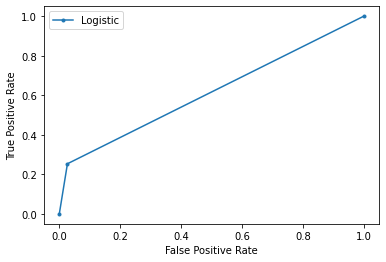

AUC= 0.6134966876845719


In [ ]:

from matplotlib import pyplot
lr_fpr, lr_tpr, lr_thresh = metrics.roc_curve(y1_val, lr_y1_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

lr_auc = metrics.roc_auc_score(y1_val, lr_y1_pred)
print("AUC=", lr_auc)

In [ ]:
#report the importance of each feature in the model
#positive numbers mean such features are more likely to predict 1, negative numbers mean such features are more likely to predict 0
for f,num in zip(X_train.columns, lr1.coef_[0]):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.05 
Education feature score:0.068 
Marital_Status feature score:-0.5548 
Income feature score:0.2158 
Spending feature score:0.1146 
Children feature score:-0.533 
Wines feature score:-0.1917 
Fruits feature score:-0.0178 
Meat feature score:0.6612 
Fish feature score:-0.056 
Sweets feature score:-0.1641 
Gold feature score:-0.0387 
Deals feature score:0.4482 
Web feature score:0.0278 
Catalog feature score:0.3548 
Store feature score:-0.6678 
WebVisits feature score:0.812 
AcceptedCmp3 feature score:0.4002 
AcceptedCmp4 feature score:0.1154 
AcceptedCmp5 feature score:0.5316 
AcceptedCmp1 feature score:0.3443 
AcceptedCmp2 feature score:0.1414 


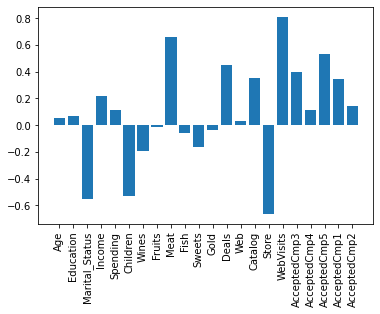

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X_train.columns], lr1.coef_[0])
plt.xticks(rotation = 90)
plt.show()

## Decission Tree

In [ ]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X, y1_train)
dt_y1_pred = dt1.predict(standardized_X_val)
dt1_accuracy = accuracy_score(y1_val, dt_y1_pred)
matrix_cleaned_dt = confusion_matrix(y1_val,dt_y1_pred, labels=[1,0])
print(matrix_cleaned_dt)
print(classification_report(y1_val, dt_y1_pred))

[[ 21  46]
 [ 41 333]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       374
           1       0.34      0.31      0.33        67

    accuracy                           0.80       441
   macro avg       0.61      0.60      0.61       441
weighted avg       0.80      0.80      0.80       441



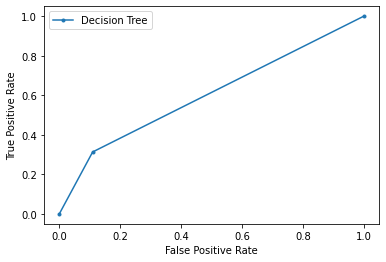

AUC= 0.6019035836858488


In [ ]:

dt_fpr, dt_tpr, dt_thresh = metrics.roc_curve(y1_val, dt_y1_pred)
# plot the roc curve for the model
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

dt_auc = metrics.roc_auc_score(y1_val, dt_y1_pred)
print("AUC=", dt_auc)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X_train.columns, dt1.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.0591 
Education feature score:0.0019 
Marital_Status feature score:0.0352 
Income feature score:0.0725 
Spending feature score:0.1021 
Children feature score:0.013 
Wines feature score:0.0873 
Fruits feature score:0.0651 
Meat feature score:0.0577 
Fish feature score:0.0273 
Sweets feature score:0.0406 
Gold feature score:0.0582 
Deals feature score:0.039 
Web feature score:0.0262 
Catalog feature score:0.0176 
Store feature score:0.0343 
WebVisits feature score:0.0473 
AcceptedCmp3 feature score:0.0506 
AcceptedCmp4 feature score:0.0006 
AcceptedCmp5 feature score:0.1229 
AcceptedCmp1 feature score:0.0343 
AcceptedCmp2 feature score:0.0072 


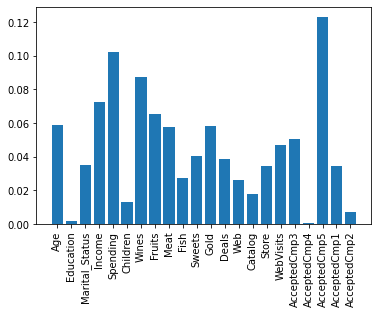

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X_train.columns], dt1.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Categorical

In [ ]:
#take the columns of the features from column 0 to column 23 as the independent variables
X3 = CleanD[CleanD.columns[0:23]]
#y1 is the dependent variable
y11 = CleanD['Response']
X3

Age   Education Marital_Status  ...  AcceptedCmp1  AcceptedCmp2 Complain
0      64  Undergrads          Alone  ...             0             0        0
1      67  Undergrads          Alone  ...             0             0        0
2      56  Undergrads      In couple  ...             0             0        0
3      37  Undergrads      In couple  ...             0             0        0
4      40         PhD      In couple  ...             0             0        0
...   ...         ...            ...  ...           ...           ...      ...
2235   54  Undergrads      In couple  ...             0             0        0
2236   75         PhD      In couple  ...             1             0        0
2237   40  Undergrads          Alone  ...             0             0        0
2238   65      Master      In couple  ...             0             0        0
2239   67         PhD      In couple  ...             0             0        0

[2203 rows x 23 columns]

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X3_train, X3_val, y11_train, y11_val = train_test_split(
    X3, y11, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler_X3 = StandardScaler().fit(X3_train.loc[:,'Income':'AcceptedCmp2'])
standardized_X3 = scaler_X3.transform(X3_train.loc[:,'Income':'AcceptedCmp2'])
standardized_X3_val = scaler_X3.transform(X3_val.loc[:,'Income':'AcceptedCmp2'])


In [ ]:
from sklearn import tree
dt5 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X3, y11_train)
dt_y11_pred = dt5.predict(standardized_X3_val)
dt5_accuracy = accuracy_score(y11_val, dt_y11_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X3_train.columns, dt5.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.0838 
Education feature score:0.1067 
Marital_Status feature score:0.0224 
Income feature score:0.0765 
Spending feature score:0.038 
Children feature score:0.0969 
Wines feature score:0.0687 
Fruits feature score:0.0438 
Meat feature score:0.0932 
Fish feature score:0.0296 
Sweets feature score:0.0229 
Gold feature score:0.0343 
Deals feature score:0.0415 
Web feature score:0.0316 
Catalog feature score:0.0484 
Store feature score:0.0006 
WebVisits feature score:0.1229 
AcceptedCmp3 feature score:0.0343 
AcceptedCmp4 feature score:0.0039 


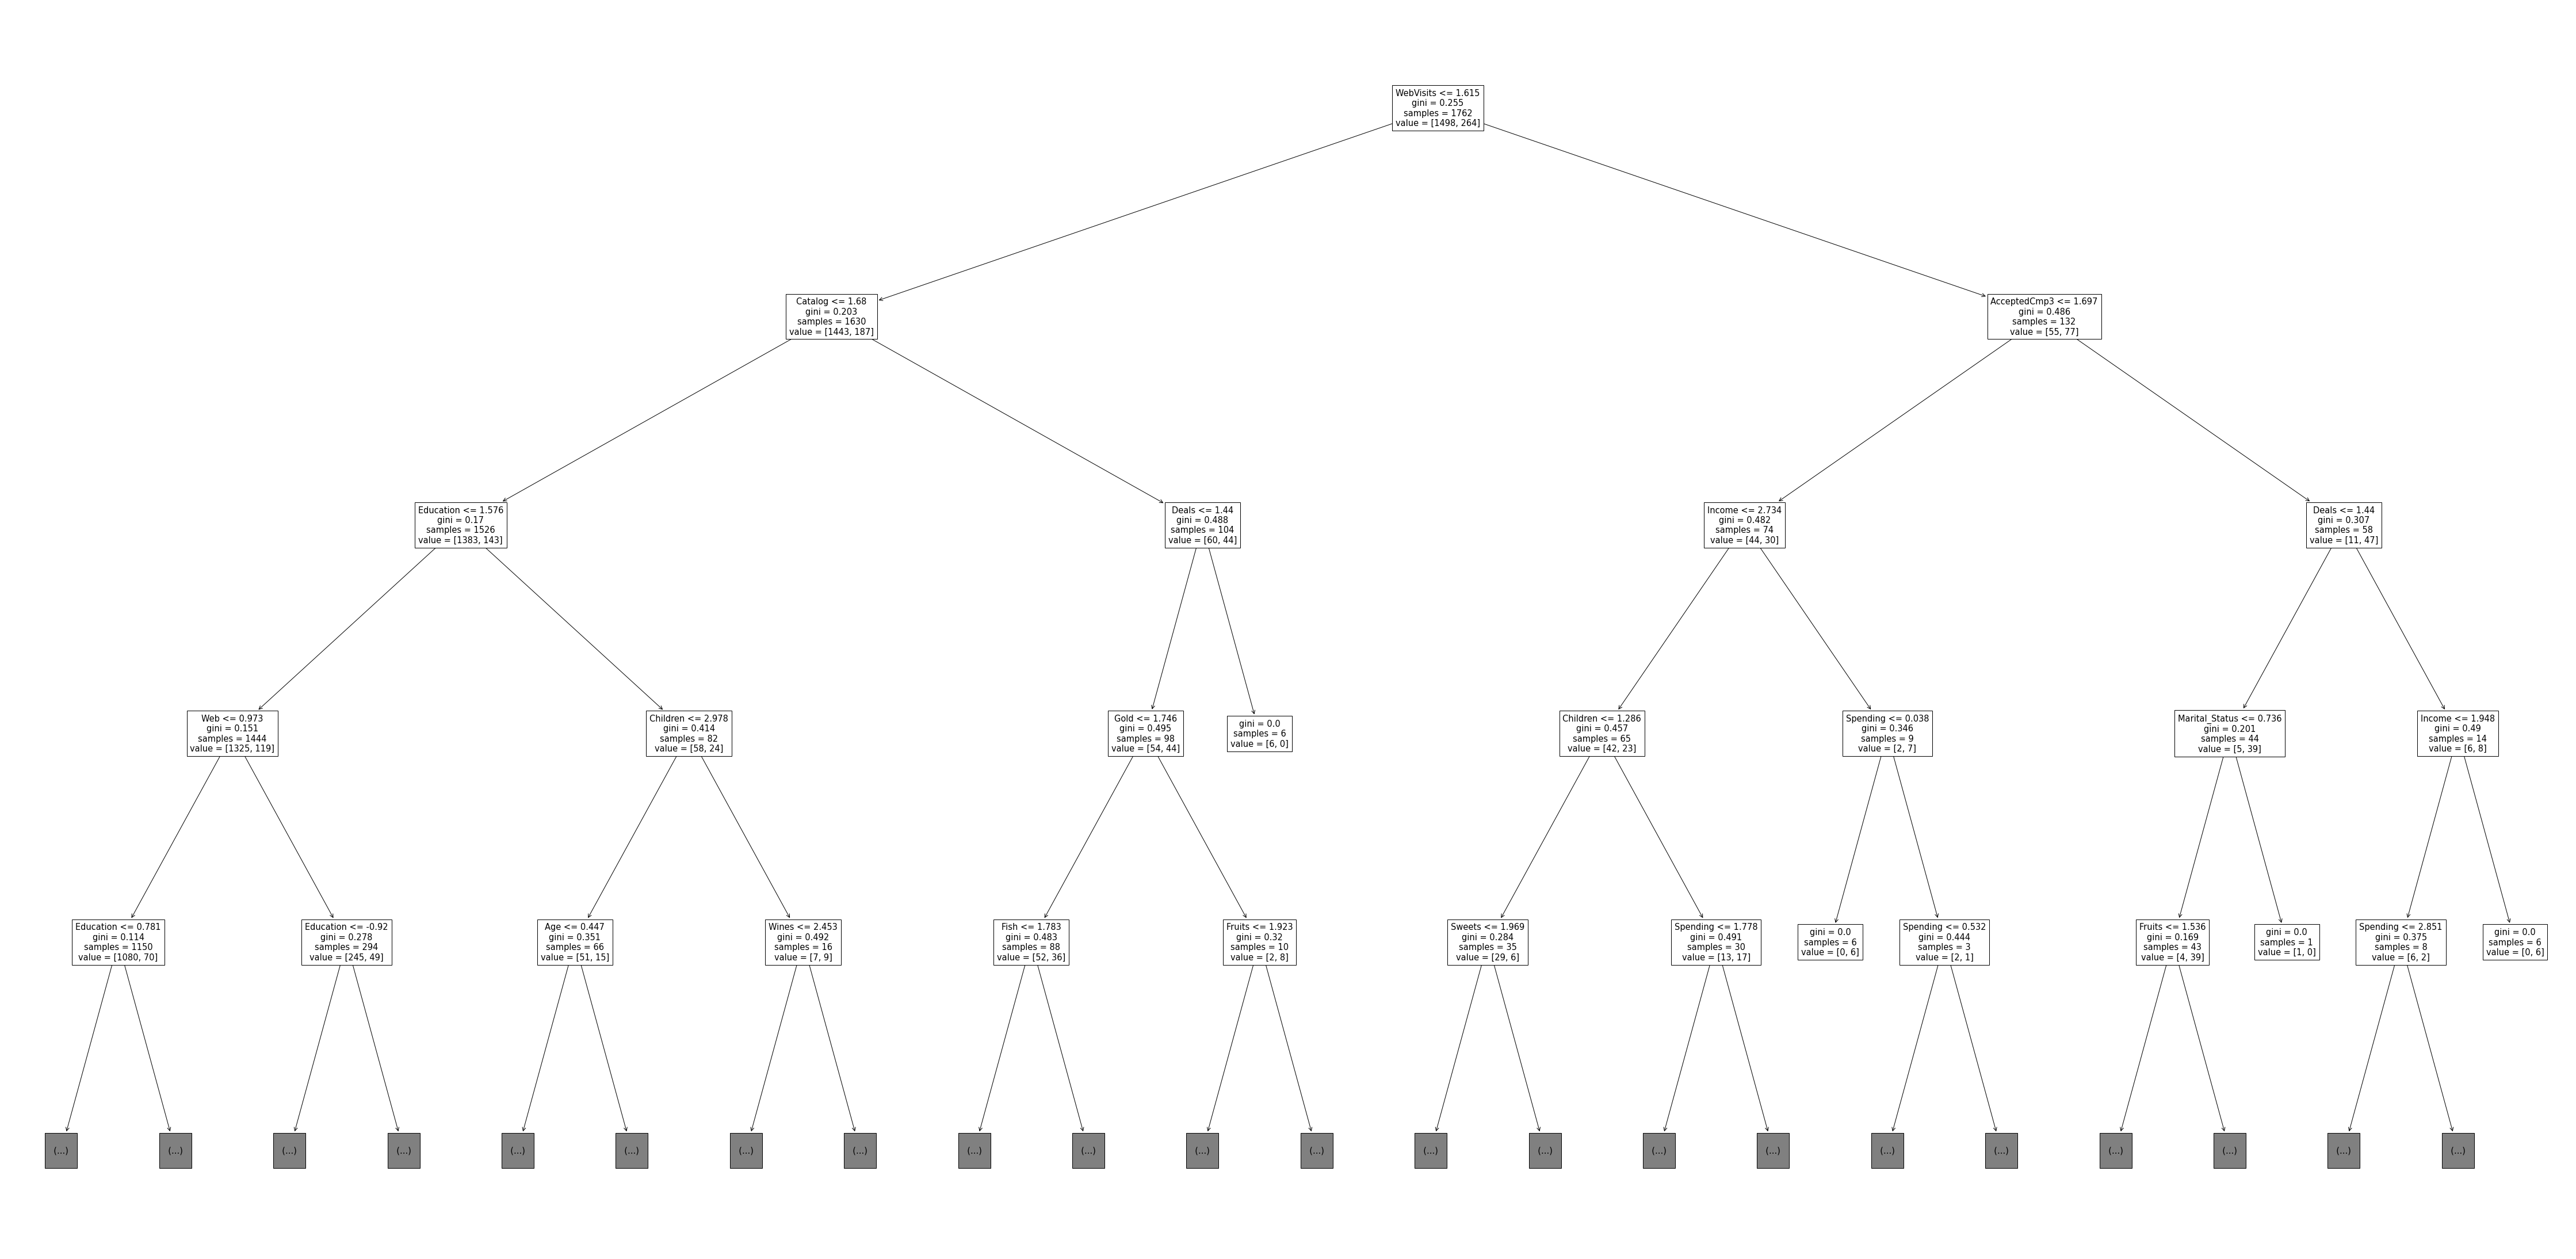

In [ ]:
fig = plt.figure(figsize=(80,40))
tree.plot_tree(dt5, max_depth = 4, feature_names = X3_train.columns)
plt.show()

## Run Decision Tree Model on splited Categories

### PEOPLE

In [ ]:
#take the columns of the features from column 0 to column 5 as the independent variables of people category, and add the complain column
Xp = CleanD[CleanD.columns[0:5]]
Xp["Complain"] = CleanD1["Complain"]
y10 = CleanD["Response"]

In [ ]:
Xp

Age   Education Marital_Status   Income  Spending  Complain
0      64  Undergrads          Alone  58138.0      1617         0
1      67  Undergrads          Alone  46344.0        27         0
2      56  Undergrads      In couple  71613.0       776         0
3      37  Undergrads      In couple  26646.0        53         0
4      40         PhD      In couple  58293.0       422         0
...   ...         ...            ...      ...       ...       ...
2235   54  Undergrads      In couple  61223.0      1341         0
2236   75         PhD      In couple  64014.0       444         0
2237   40  Undergrads          Alone  56981.0      1241         0
2238   65      Master      In couple  69245.0       843         0
2239   67         PhD      In couple  52869.0       172         0

[2203 rows x 6 columns]

In [ ]:
## use pd.concat to join the new columns with your original dataframe
CleanD2 = pd.concat([Xp,pd.get_dummies(Xp['Education'], prefix='Edu')],axis=1)
# now drop the original 'Education' column (you don't need it anymore)
CleanD2.drop(['Education'],axis=1, inplace=True)
#use pd.concat to join the new columns with your original dataframe
CleanD2 = pd.concat([CleanD2,pd.get_dummies(CleanD2['Marital_Status'], prefix='Status')],axis=1)
# now drop the original 'Marital_Status' column (you don't need it anymore)
CleanD2.drop(['Marital_Status'],axis=1, inplace=True)


In [ ]:
CleanD2

Age   Income  Spending  ...  Edu_Undergrads  Status_Alone  Status_In couple
0      64  58138.0      1617  ...               1             1                 0
1      67  46344.0        27  ...               1             1                 0
2      56  71613.0       776  ...               1             0                 1
3      37  26646.0        53  ...               1             0                 1
4      40  58293.0       422  ...               0             0                 1
...   ...      ...       ...  ...             ...           ...               ...
2235   54  61223.0      1341  ...               1             0                 1
2236   75  64014.0       444  ...               0             0                 1
2237   40  56981.0      1241  ...               1             1                 0
2238   65  69245.0       843  ...               0             0                 1
2239   67  52869.0       172  ...               0             0                 1

[2203 rows x 10 columns]

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
Xp_train, Xp_val, y10_train, y10_val = train_test_split(
    CleanD2, y10, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
scaler3 = StandardScaler().fit(Xp_train.loc[:, 'Income': 'Complain'])
standardized_Xp = scaler3.transform(Xp_train.loc[:, 'Income': 'Complain'])
standardized_Xp_val = scaler3.transform(Xp_val.loc[:, 'Income': 'Complain'])
dtp = tree.DecisionTreeClassifier(random_state=0).fit(Xp_train, y10_train)

In [ ]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dtp = tree.DecisionTreeClassifier(random_state=0).fit(Xp_train, y10_train)
#dtp_y10_pred = dtp.predict(standardized_Xp_val)
#dtp_accuracy = accuracy_score(y10_val, dtp_y10_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(Xp_train.columns, dtp.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.19 
Income feature score:0.305 
Spending feature score:0.4061 
Complain feature score:0.0 
Edu_HighSchool feature score:0.0027 
Edu_Master feature score:0.0268 
Edu_PhD feature score:0.0232 
Edu_Undergrads feature score:0.0222 
Status_Alone feature score:0.0012 
Status_In couple feature score:0.0228 


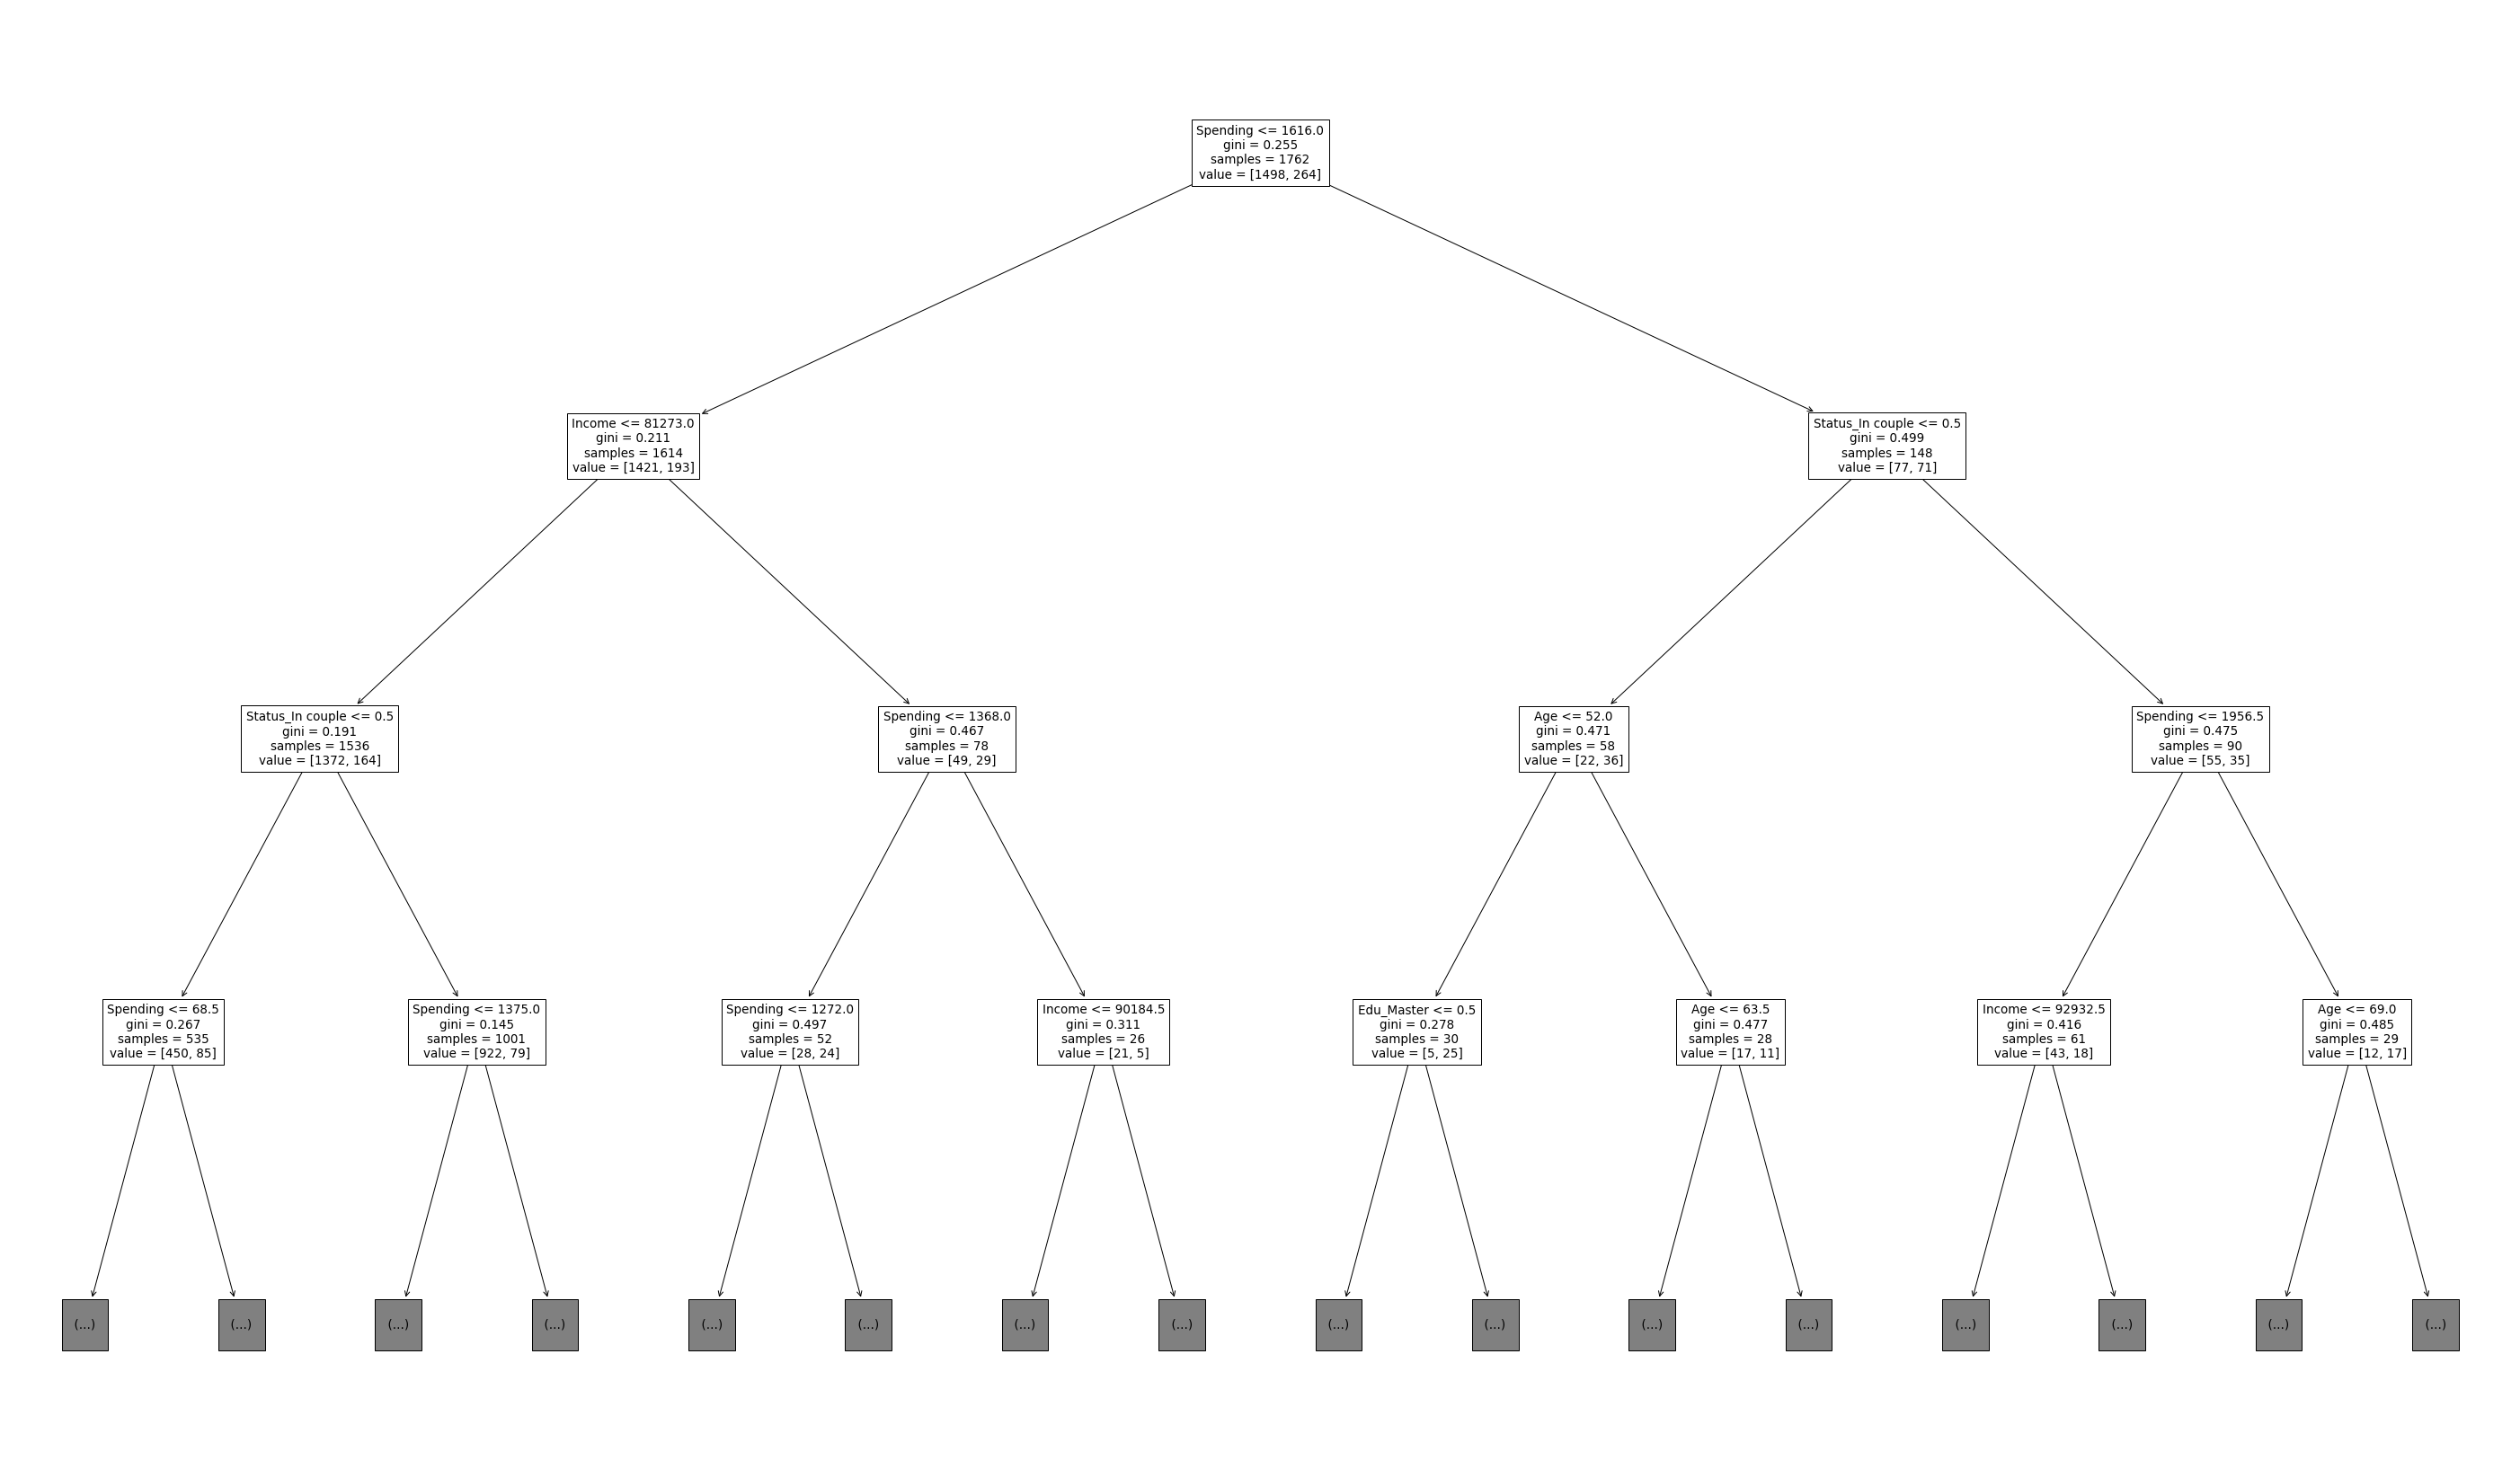

In [ ]:
#Plot the decision tree for people feature. 
fig = plt.figure(figsize=(50,30))
tree.plot_tree(dtp, max_depth = 3, feature_names = Xp_train.columns)
plt.show()

In [ ]:
#save the image
fig.savefig("people_decistion_tree.png")

### Products

In [ ]:
#take the columns of the features from column 9 to column 14 as the independent variables of products category
Xp1 = CleanD1[CleanD1.columns[6:12]]

#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
Xp1_train, Xp1_val, y1_train, y1_val = train_test_split(
    Xp1, y1, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler4 = StandardScaler().fit(Xp1_train)
standardized_Xp1 = scaler4.transform(Xp1_train)
standardized_Xp1_val = scaler4.transform(Xp1_val)

#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dtp1 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_Xp1, y1_train)
dtp1_y1_pred = dtp1.predict(standardized_Xp1_val)
dtp1_accuracy = accuracy_score(y1_val, dtp1_y1_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(Xp1_train.columns, dtp1.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Wines feature score:0.2436 
Fruits feature score:0.0979 
Meat feature score:0.2415 
Fish feature score:0.136 
Sweets feature score:0.1222 
Gold feature score:0.1588 


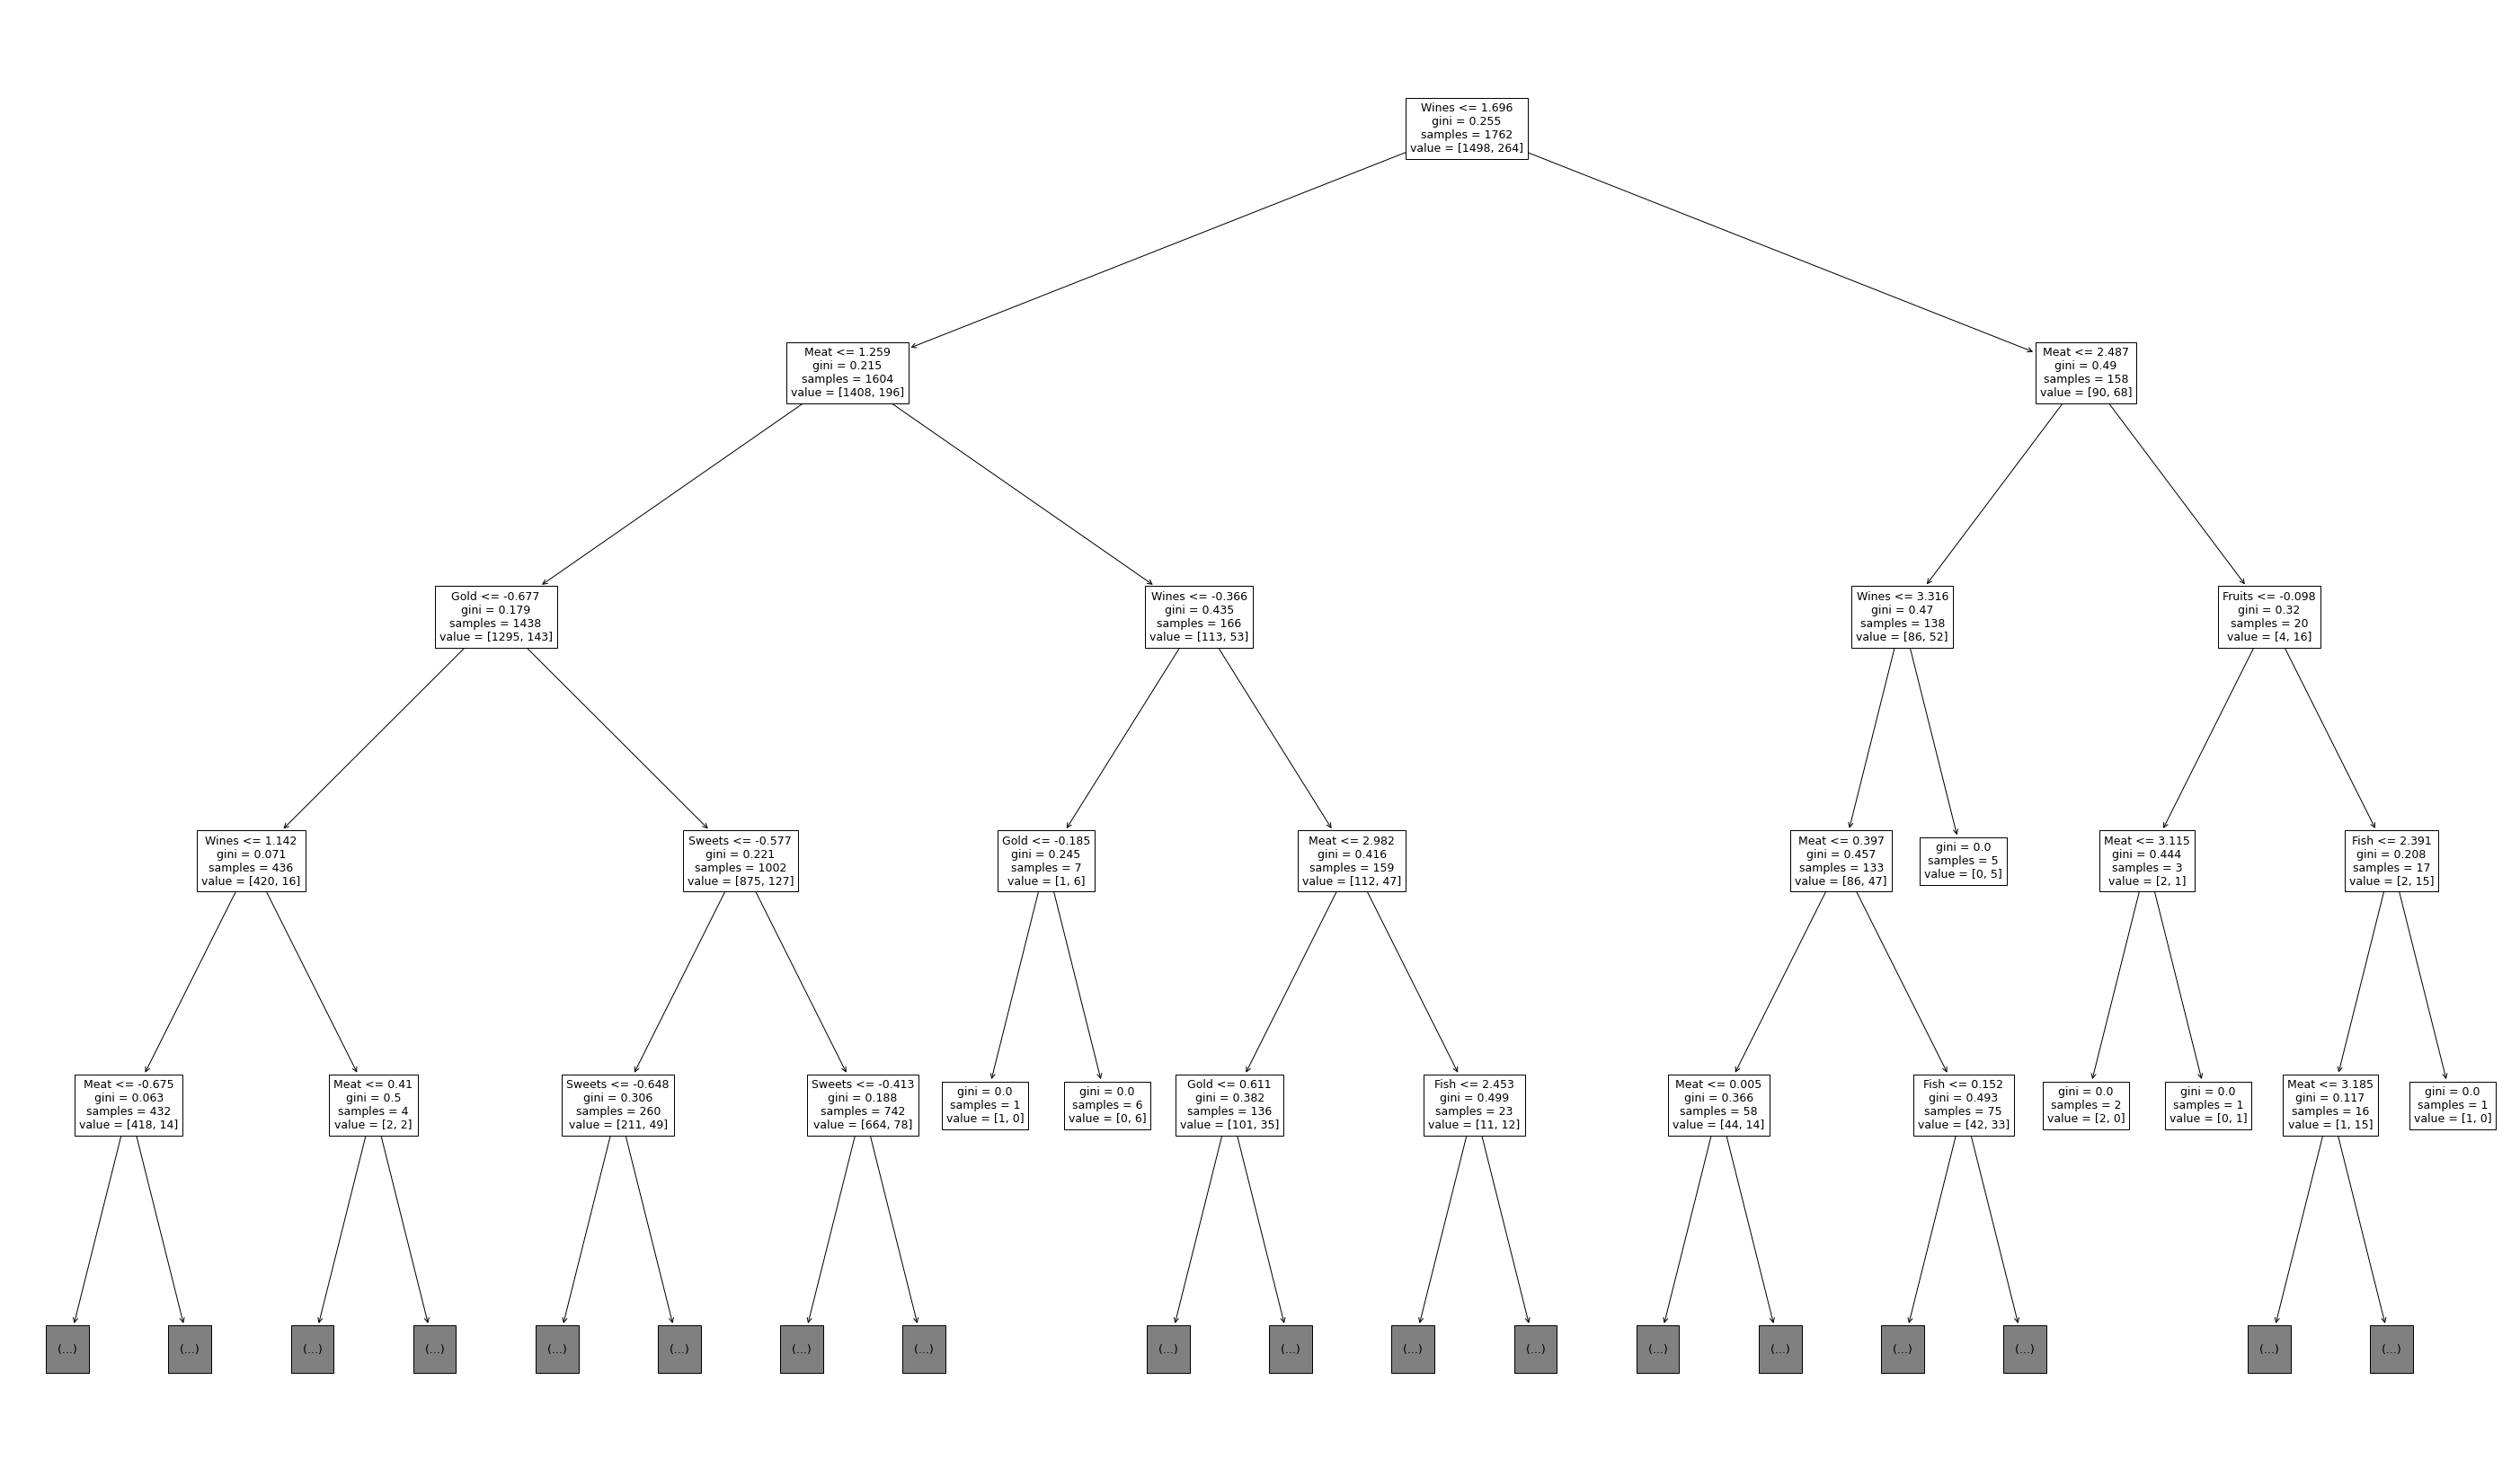

In [ ]:
#Plot the decision tree for product feature.
fig = plt.figure(figsize=(50,30))
tree.plot_tree(dtp1, max_depth = 4, feature_names = Xp1_train.columns)
plt.show()

In [ ]:
# save the image
fig.savefig("products_decistion_tree.png")

### PLACE

In [ ]:
#take the columns of the features from column 9 to column 14 as the independent variables of products category
Xp2 = CleanD1[CleanD1.columns[13:17]]

#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
Xp2_train, Xp2_val, y1_train, y1_val = train_test_split(
    Xp2, y1, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler5 = StandardScaler().fit(Xp2_train)
standardized_Xp2 = scaler5.transform(Xp2_train)
standardized_Xp2_val = scaler5.transform(Xp2_val)

#Response: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dtp2 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_Xp2, y1_train)
dtp2_y1_pred = dtp2.predict(standardized_Xp2_val)
dtp2_accuracy = accuracy_score(y1_val, dtp2_y1_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(Xp2_train.columns, dtp2.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Web feature score:0.2303 
Catalog feature score:0.224 
Store feature score:0.2869 
WebVisits feature score:0.2588 


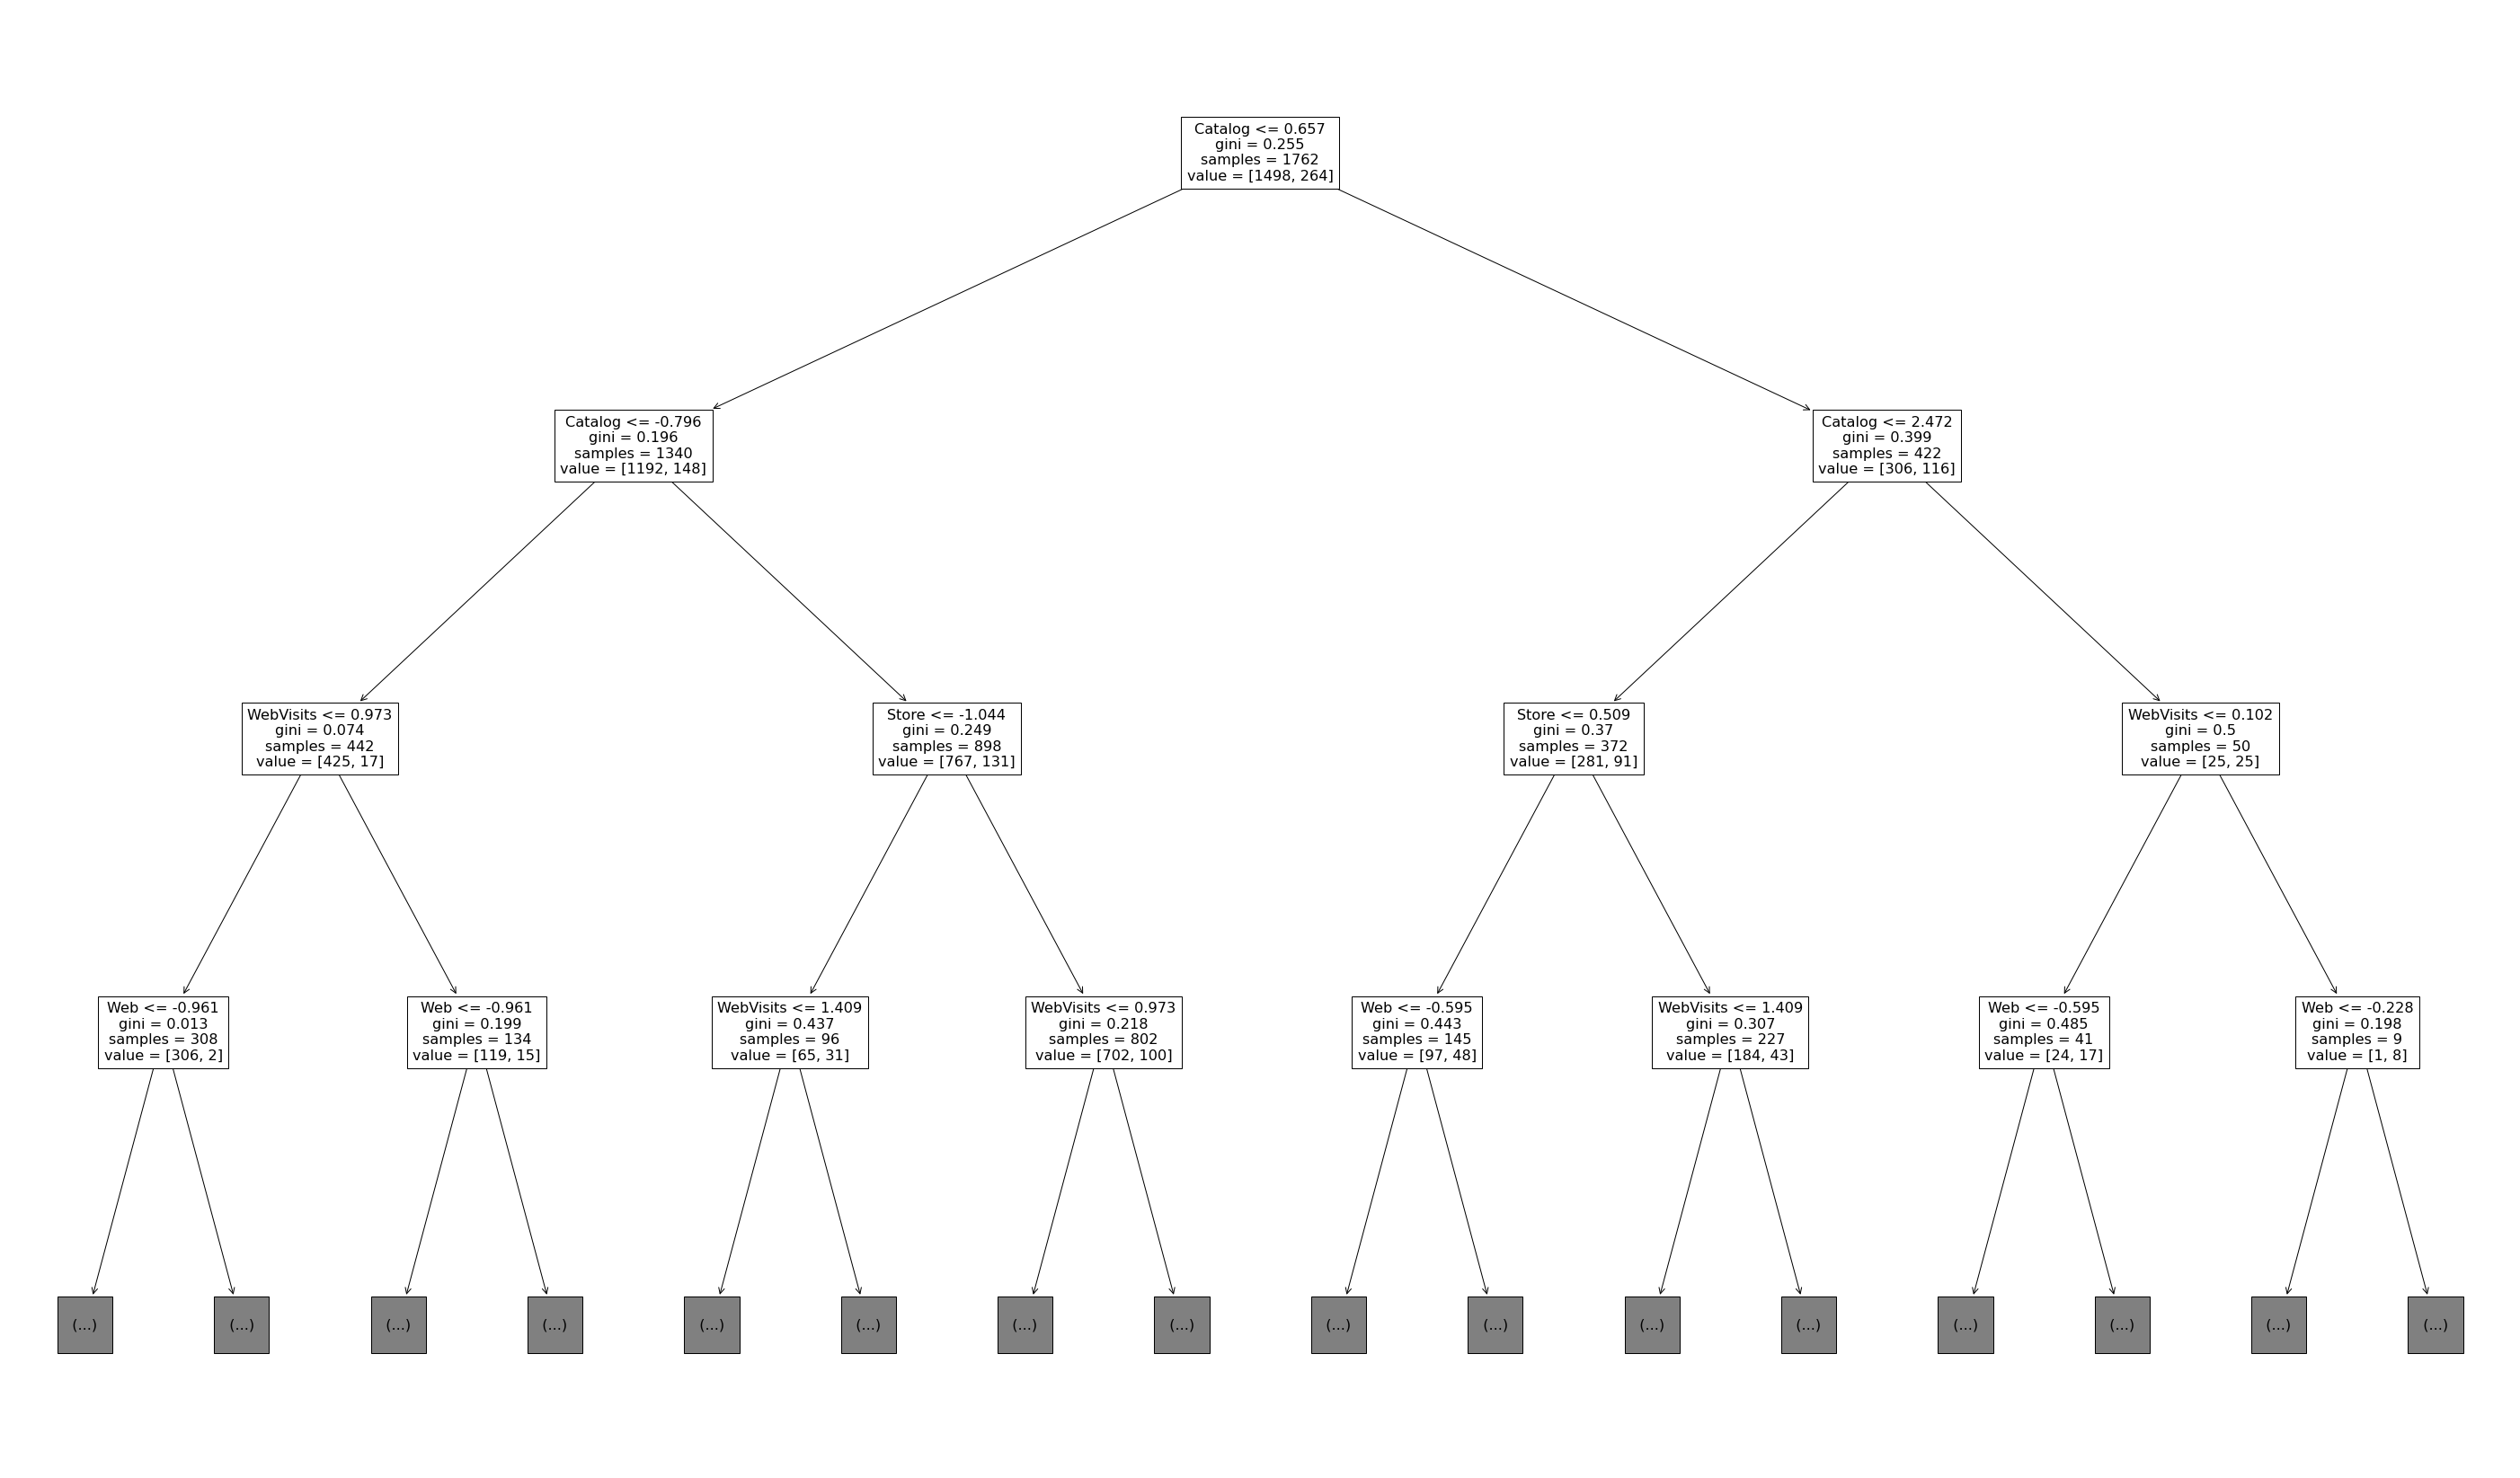

In [ ]:
# Plot the decision tree for the place feature.
fig = plt.figure(figsize=(50,30))
tree.plot_tree(dtp2, max_depth = 3, feature_names = Xp2_train.columns)
plt.show()

In [ ]:
#save the image
fig.savefig("places_decistion_tree.png")

## AcceptedCmp 1-5: Take independent variables out for predicting 

In [ ]:
#take the columns of the features from column 0 to column 22 as the independent variables
X1 = CleanD1[CleanD1.columns[0:17]]
X1["Complain"] = CleanD1["Complain"]
X1

Age  Education  Marital_Status  ...  Store  WebVisits Complain
0      64          0               0  ...      4          7        0
1      67          0               0  ...      2          5        0
2      56          0               1  ...     10          4        0
3      37          0               1  ...      4          6        0
4      40          1               1  ...      6          5        0
...   ...        ...             ...  ...    ...        ...      ...
2235   54          0               1  ...      4          5        0
2236   75          1               1  ...      5          7        0
2237   40          0               0  ...     13          6        0
2238   65          2               1  ...     10          3        0
2239   67          1               1  ...      4          7        0

[2203 rows x 18 columns]

# **For our curiousity, we ran the models on individual AcceptedCmp columns. However, the results from these analysis did not contribute towards our final interprtation**

## Prediction Models on AcceptedCmp1: 

In [ ]:
#AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#y2 is the dependent variable(Compaign #1)
y2 = CleanD1['AcceptedCmp1']

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X1_train, X1_val, y2_train, y2_val = train_test_split(
    X1, y2, test_size=0.2, random_state=1)

#Standardize the attributes/features from the dataset
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler().fit(X1_train)
standardized_X1 = scaler1.transform(X1_train)
standardized_X1_val = scaler1.transform(X1_val)

## Logistic Regression

In [ ]:
#Run the logistic regression model
lr2 = LogisticRegression(random_state=0).fit(standardized_X1, y2_train)
lr_y2_pred = lr2.predict(standardized_X1_val)

#report how good is the model with some statistics
from sklearn.metrics import accuracy_score
lr2_accuracy = accuracy_score(y2_val, lr_y2_pred)
from sklearn.metrics import classification_report
print(classification_report(y2_val, lr_y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       419
           1       0.60      0.27      0.37        22

    accuracy                           0.95       441
   macro avg       0.78      0.63      0.68       441
weighted avg       0.94      0.95      0.95       441



In [ ]:
#report the importance of each feature in the model
#positive numbers mean such features are more likely to predict 1, negative numbers mean such features are more likely to predict 0
for f,num in zip(X1_train.columns, lr2.coef_[0]):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:-0.1828 
Education feature score:-0.0815 
Marital_Status feature score:0.1068 
Income feature score:1.5891 
Spending feature score:0.2122 
Children feature score:-0.4434 
Wines feature score:0.4405 
Fruits feature score:-0.1314 
Meat feature score:-0.1259 
Fish feature score:0.1647 
Sweets feature score:0.068 
Gold feature score:0.0231 
Deals feature score:0.0313 
Web feature score:-0.0029 
Catalog feature score:0.3529 
Store feature score:-0.1273 
WebVisits feature score:0.4868 
Complain feature score:-0.3671 


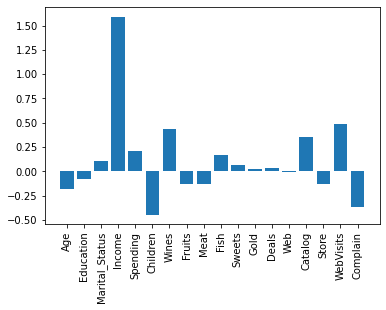

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x1 for x1 in X1_train.columns], lr2.coef_[0])
plt.xticks(rotation = 90)
plt.show()

## Decision Tree

In [ ]:
#Response: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dt2 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X1, y2_train)
dt_y2_pred = dt2.predict(standardized_X1_val)
dt2_accuracy = accuracy_score(y2_val, dt_y2_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X1_train.columns, dt2.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.0495 
Education feature score:0.0 
Marital_Status feature score:0.0037 
Income feature score:0.2289 
Spending feature score:0.0935 
Children feature score:0.0234 
Wines feature score:0.139 
Fruits feature score:0.0814 
Meat feature score:0.0354 
Fish feature score:0.0551 
Sweets feature score:0.0162 
Gold feature score:0.0705 
Deals feature score:0.0115 
Web feature score:0.0551 
Catalog feature score:0.0411 
Store feature score:0.0533 
WebVisits feature score:0.0424 
Complain feature score:0.0 


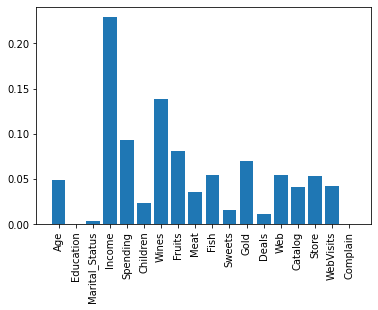

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X1_train.columns], dt2.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Prediction Models on AcceptedCmp2: 

In [ ]:
#AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#y3 is the dependent variable(Compaign #2)
y3 = CleanD1['AcceptedCmp2']

## Logistic Regression

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X1_train, X1_val, y3_train, y3_val = train_test_split(
    X1, y3, test_size=0.2, random_state=1)

#Run the logistic regression model
lr3 = LogisticRegression(random_state=0).fit(standardized_X1, y3_train)
lr_y3_pred = lr3.predict(standardized_X1_val)

#report how good is the model with some statistics
from sklearn.metrics import accuracy_score
lr3_accuracy = accuracy_score(y3_val, lr_y3_pred)
from sklearn.metrics import classification_report
print(classification_report(y3_val, lr_y3_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.00      0.00      0.00         5

    accuracy                           0.99       441
   macro avg       0.49      0.50      0.50       441
weighted avg       0.98      0.99      0.98       441



#### Because the data shows that accepted campaign #2 for all the customers are 0, the prediction will be 100% accuracy. So we do not use another method to compare.

## Prediction Models on AcceptedCmp3: 

In [ ]:
#AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#y4 is the dependent variable(Compaign #3)
y4 = CleanD1['AcceptedCmp3']

## Logistic Regression

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X1_train, X1_val, y4_train, y4_val = train_test_split(
    X1, y4, test_size=0.2, random_state=1)

#Run the logistic regression model
lr4 = LogisticRegression(random_state=0).fit(standardized_X1, y4_train)
lr_y4_pred = lr4.predict(standardized_X1_val)

#report how good is the model with some statistics
from sklearn.metrics import accuracy_score
lr4_accuracy = accuracy_score(y4_val, lr_y4_pred)
from sklearn.metrics import classification_report
print(classification_report(y4_val, lr_y4_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       404
           1       0.29      0.05      0.09        37

    accuracy                           0.91       441
   macro avg       0.60      0.52      0.52       441
weighted avg       0.87      0.91      0.88       441



In [ ]:
#report the importance of each feature in the model
#positive numbers mean such features are more likely to predict 1, negative numbers mean such features are more likely to predict 0
for f,num in zip(X1_train.columns, lr3.coef_[0]):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:-0.1937 
Education feature score:-0.4879 
Marital_Status feature score:0.1117 
Income feature score:1.2502 
Spending feature score:0.1583 
Children feature score:-0.5254 
Wines feature score:0.7536 
Fruits feature score:-0.5321 
Meat feature score:-0.4336 
Fish feature score:-0.4469 
Sweets feature score:-0.4862 
Gold feature score:0.107 
Deals feature score:-0.1901 
Web feature score:-0.5 
Catalog feature score:0.4696 
Store feature score:0.3392 
WebVisits feature score:0.6268 
Complain feature score:-0.2121 


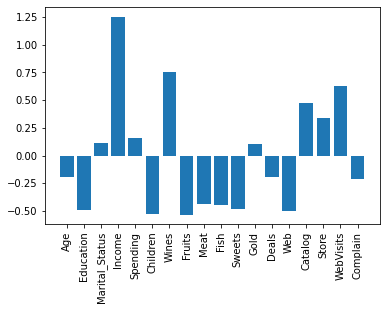

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x1 for x1 in X1_train.columns], lr3.coef_[0])
plt.xticks(rotation = 90)
plt.show()

## Decision Tree

In [ ]:
#Response: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dt3 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X1, y4_train)
dt_y4_pred = dt3.predict(standardized_X1_val)
dt3_accuracy = accuracy_score(y4_val, dt_y4_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X1_train.columns, dt3.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.1251 
Education feature score:0.0 
Marital_Status feature score:0.0058 
Income feature score:0.086 
Spending feature score:0.0918 
Children feature score:0.0119 
Wines feature score:0.0719 
Fruits feature score:0.0393 
Meat feature score:0.0502 
Fish feature score:0.0925 
Sweets feature score:0.0607 
Gold feature score:0.1668 
Deals feature score:0.0121 
Web feature score:0.0295 
Catalog feature score:0.0237 
Store feature score:0.0971 
WebVisits feature score:0.0276 
Complain feature score:0.0081 


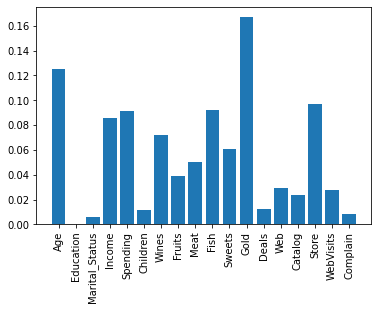

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X1_train.columns], dt3.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Prediction Models on AcceptedCmp4: 

In [ ]:
#AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#y5 is the dependent variable(Compaign #4)
y5 = CleanD1['AcceptedCmp4']

## Logistic Regression

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X1_train, X1_val, y5_train, y5_val = train_test_split(
    X1, y5, test_size=0.2, random_state=1)

#Run the logistic regression model
lr5 = LogisticRegression(random_state=0).fit(standardized_X1, y5_train)
lr_y5_pred = lr5.predict(standardized_X1_val)

#report how good is the model with some statistics
from sklearn.metrics import accuracy_score
lr5_accuracy = accuracy_score(y5_val, lr_y5_pred)
from sklearn.metrics import classification_report
print(classification_report(y5_val, lr_y5_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       407
           1       0.70      0.21      0.32        34

    accuracy                           0.93       441
   macro avg       0.82      0.60      0.64       441
weighted avg       0.92      0.93      0.91       441



In [ ]:
#report the importance of each feature in the model
#positive numbers mean such features are more likely to predict 1, negative numbers mean such features are more likely to predict 0
for f,num in zip(X1_train.columns, lr5.coef_[0]):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.014 
Education feature score:-0.151 
Marital_Status feature score:0.0405 
Income feature score:1.568 
Spending feature score:0.2006 
Children feature score:-0.4363 
Wines feature score:0.7048 
Fruits feature score:-0.2613 
Meat feature score:-0.2691 
Fish feature score:-0.2385 
Sweets feature score:-0.3001 
Gold feature score:-0.3852 
Deals feature score:0.1312 
Web feature score:-0.1568 
Catalog feature score:-0.1786 
Store feature score:0.0173 
WebVisits feature score:0.712 
Complain feature score:-0.3271 


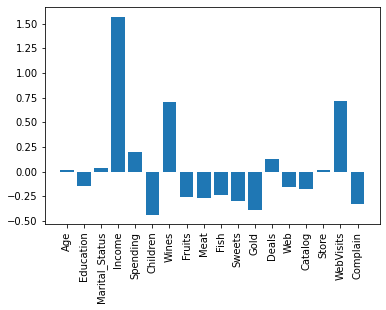

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x1 for x1 in X1_train.columns], lr5.coef_[0])
plt.xticks(rotation = 90)
plt.show()

## Decision Tree

In [ ]:
#Response: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dt4 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X1, y5_train)
dt_y5_pred = dt4.predict(standardized_X1_val)
dt4_accuracy = accuracy_score(y5_val, dt_y5_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X1_train.columns, dt4.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.0474 
Education feature score:0.0368 
Marital_Status feature score:0.0054 
Income feature score:0.1231 
Spending feature score:0.0832 
Children feature score:0.0 
Wines feature score:0.2241 
Fruits feature score:0.0234 
Meat feature score:0.0726 
Fish feature score:0.0651 
Sweets feature score:0.073 
Gold feature score:0.0672 
Deals feature score:0.0095 
Web feature score:0.0522 
Catalog feature score:0.0302 
Store feature score:0.0618 
WebVisits feature score:0.0251 
Complain feature score:0.0 


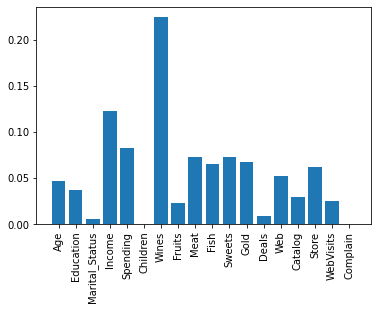

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X1_train.columns], dt4.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Prediction Models on AcceptedCmp5: 

In [ ]:
#AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#y6 is the dependent variable(Compaign #5)
y6 = CleanD1['AcceptedCmp5']

## Logistic Regression

In [ ]:
#split the data into training and validation sets with a ratio of 8:2
from sklearn.model_selection import train_test_split
X1_train, X1_val, y6_train, y6_val = train_test_split(
    X1, y6, test_size=0.2, random_state=1)

#Run the logistic regression model
lr6 = LogisticRegression(random_state=0).fit(standardized_X1, y6_train)
lr_y6_pred = lr6.predict(standardized_X1_val)

#report how good is the model with some statistics
from sklearn.metrics import accuracy_score
lr6_accuracy = accuracy_score(y6_val, lr_y6_pred)
from sklearn.metrics import classification_report
print(classification_report(y6_val, lr_y6_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       410
           1       0.77      0.55      0.64        31

    accuracy                           0.96       441
   macro avg       0.87      0.77      0.81       441
weighted avg       0.95      0.96      0.95       441



In [ ]:
#report the importance of each feature in the model
#positive numbers mean such features are more likely to predict 1, negative numbers mean such features are more likely to predict 0
for f,num in zip(X1_train.columns, lr6.coef_[0]):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:-0.2766 
Education feature score:-0.1761 
Marital_Status feature score:0.1903 
Income feature score:2.465 
Spending feature score:0.4091 
Children feature score:-0.6592 
Wines feature score:0.9522 
Fruits feature score:-0.2431 
Meat feature score:-0.2508 
Fish feature score:-0.3701 
Sweets feature score:0.03 
Gold feature score:0.2313 
Deals feature score:-0.4537 
Web feature score:0.0025 
Catalog feature score:0.0377 
Store feature score:-0.0506 
WebVisits feature score:-0.1076 
Complain feature score:0.1137 


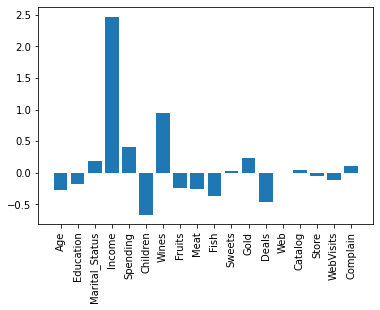

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x1 for x1 in X1_train.columns], lr6.coef_[0])
plt.xticks(rotation = 90)
plt.show()

## Decision Tree

In [ ]:
#Response: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#Run the decission tree model
from sklearn import tree
dt5 = tree.DecisionTreeClassifier(random_state=0).fit(standardized_X1, y6_train)
dt_y6_pred = dt5.predict(standardized_X1_val)
dt5_accuracy = accuracy_score(y6_val, dt_y6_pred)

In [ ]:
#report the importance of each feature in the model
for f,num in zip(X1_train.columns, dt5.feature_importances_):
    print('{} feature score:{} '.format(f,round(num,4)))

Age feature score:0.0656 
Education feature score:0.0267 
Marital_Status feature score:0.0089 
Income feature score:0.3828 
Spending feature score:0.1026 
Children feature score:0.0167 
Wines feature score:0.1212 
Fruits feature score:0.0409 
Meat feature score:0.0585 
Fish feature score:0.0338 
Sweets feature score:0.0413 
Gold feature score:0.0414 
Deals feature score:0.0068 
Web feature score:0.0119 
Catalog feature score:0.0132 
Store feature score:0.0259 
WebVisits feature score:0.0015 
Complain feature score:0.0 


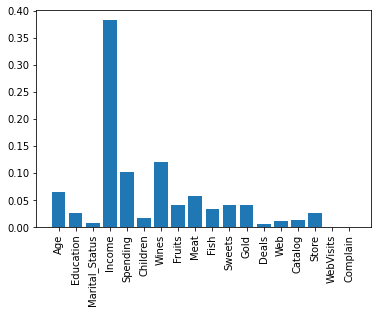

In [ ]:
#plot the graph with the importance of each feature in the model
plt.bar([x for x in X1_train.columns], dt5.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

# **Oversampling using SMOTE**

In [ ]:
# As there is a lot of imbalance in the response variable, we use SMOTE to oversample the data
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(standardized_Xr, y1r_train)
 
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, counts of label '1': 1526
After OverSampling, counts of label '0': 1526


## **Logistic Regression on oversampled data**

In [ ]:
lr1r_processed = LogisticRegression(random_state=0).fit(X_train_sm, y_train_sm)
lr_y1r_pred_processed = lr1r_processed.predict(standardized_Xr_val)

#printing the confusion matrix and classification report
from sklearn.metrics import accuracy_score
lr1r_new_accuracy = accuracy_score(y1r_val, lr_y1r_pred_processed)
from sklearn.metrics import classification_report
matrix_over_lr = confusion_matrix(y1r_val,lr_y1r_pred_processed, labels=[1,0])
matrix_over_lr
print(classification_report(y1r_val, lr_y1r_pred_processed))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       380
           1       0.45      0.76      0.57        68

    accuracy                           0.82       448
   macro avg       0.70      0.80      0.73       448
weighted avg       0.88      0.82      0.84       448



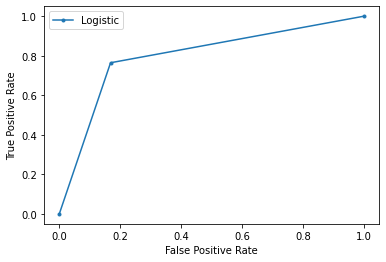

AUC= 0.7981424148606812


In [ ]:
# plotting the roc curve for the model
from sklearn import metrics
from matplotlib import pyplot
lr_fpr, lr_tpr, lr_thresh = metrics.roc_curve(y1r_val, lr_y1r_pred_processed)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# printing the AUC for the curve
lr_auc = metrics.roc_auc_score(y1r_val, lr_y1r_pred_processed)
print("AUC=", lr_auc)

## **Decision Tree on oversampled data**

In [ ]:
dtr_processed = tree.DecisionTreeClassifier(random_state=0).fit(X_train_sm, y_train_sm)
dt_y1r_pred_processed = dtr.predict(standardized_Xr_val)

#printing the confusion matrix and classification report
dtr_new_accuracy = accuracy_score(y1r_val, dt_y1r_pred_processed)
matrix_over_lr = confusion_matrix(y1r_val,dt_y1r_pred_processed, labels=[1,0])
print(matrix_over_lr)
print(classification_report(y1r_val, dt_y1r_pred_processed))

[[ 28  40]
 [ 38 342]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       380
           1       0.42      0.41      0.42        68

    accuracy                           0.83       448
   macro avg       0.66      0.66      0.66       448
weighted avg       0.82      0.83      0.82       448



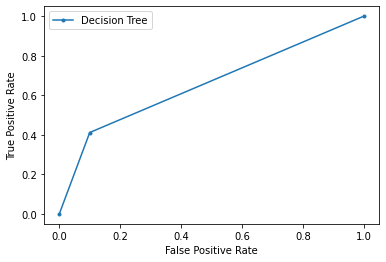

AUC= 0.6558823529411765


In [ ]:
# plotting the roc curve for the model
dt_fpr, dt_tpr, dt_thresh = metrics.roc_curve(y1r_val, dt_y1r_pred_processed)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

#printing the AUC for the curve
dt_auc = metrics.roc_auc_score(y1r_val, dt_y1r_pred_processed)
print("AUC=", dt_auc)

# **K-means**

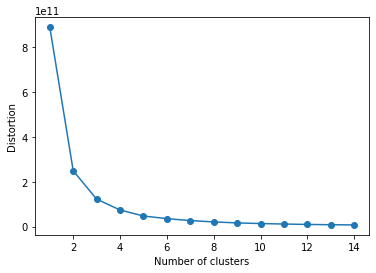

In [ ]:
from sklearn.cluster import KMeans

#We want to determine what number is the best one for classifying the customers into clusters.
inertia1 = []
for i in range(1, 15):
    km1 = KMeans(
        n_clusters=i, init='random',
        n_init=10, random_state=0
    )
    km1.fit(X)
    inertia1.append(km1.inertia_)

# plot
plt.plot(range(1, 15), inertia1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#From the elbow method, we can see that 3 clusters is going to be our best cluster number!

In [ ]:
#Using the PCA algorithm to shrinkage the features into two features for better understanding and visualizing with the Kmeans graph
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
X_new = pca.fit_transform(X)
X_new

array([[ 5937.17506364,  -930.48754609],
       [-5903.81986817,   507.29299779],
       [19379.5620592 ,   369.74858541],
       ...,
       [ 4771.6916547 ,  -693.61224245],
       [17014.88124236,   224.59998112],
       [  623.40212431,   524.58281512]])

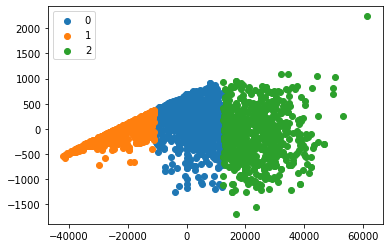

In [ ]:
#Run the Kmeans method to classify the total number of customers into 3 different clusters 
km1 = KMeans(
    n_clusters=3, init='random',
    n_init=10,  random_state=0
).fit(X_new)
labels_n = km1.predict(X_new)
CleanDD = CleanD
CleanDD['labels'] = labels_n

#plot the Kmeans graph
for i in np.unique(labels_n):
    plt.scatter(X_new[labels_n == i , 0] , X_new[labels_n == i , 1] , label = i)
plt.legend()
plt.show()

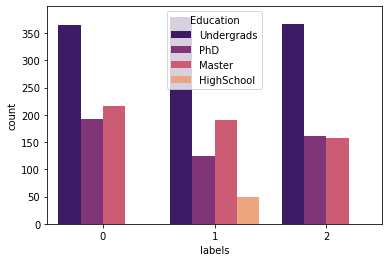

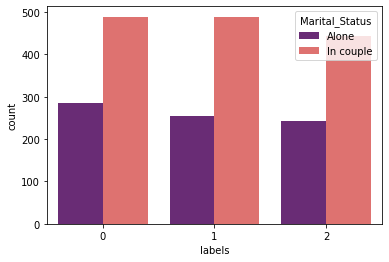

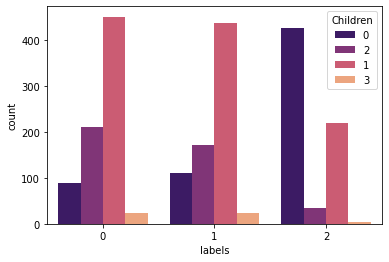

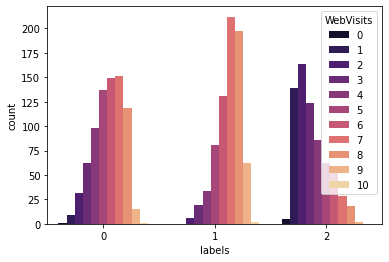

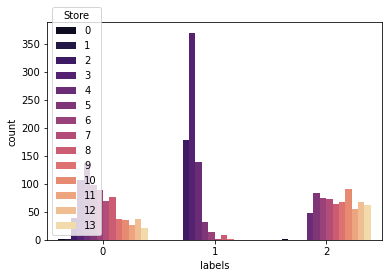

In [ ]:
#Show the counts of several features in different clusters that we classified using Kmeans.
profile = ['Education', 'Marital_Status', "Children", "WebVisits", "Store"]

for i in profile:
  plt.figure()
  sns.countplot(x='labels', data=CleanDD, hue=CleanDD[i],palette = 'magma')
  plt.show()

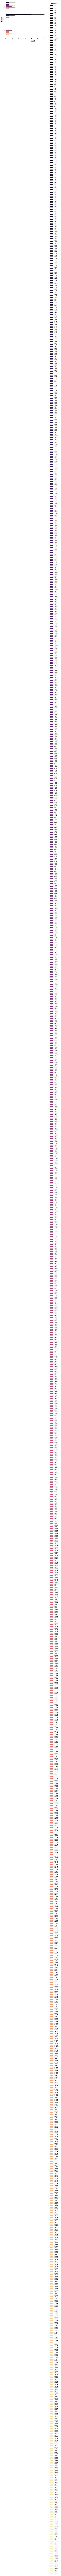

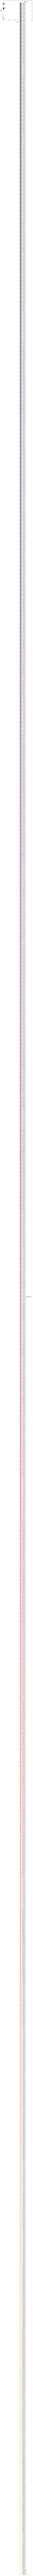

In [ ]:
profile = [ "Spending", "Income"]

for i in profile:
  plt.figure()
  sns.countplot(y='labels', data=CleanDD, hue=CleanDD[i],palette = 'magma')
  plt.show()